In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn import decomposition

In [104]:
# load the file
df = pd.read_csv('./BankChurners(new).csv')
df.head()

,Unnamed: 0,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Gender_M,Gender_F,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Marital_Status_Divorced,Card_Category_Blue,Card_Category_Gold,Card_Category_Silver,Card_Category_Platinum
0,0,1.0,0.404255,0.6,0.2,0.50,0.604651,0.8,0.166667,0.500000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1.0,0.489362,1.0,0.6,0.00,0.720930,1.0,0.166667,0.333333,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2,1.0,0.531915,0.6,0.6,0.75,0.534884,0.6,0.166667,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,1.0,0.297872,0.8,0.2,0.00,0.488372,0.4,0.666667,0.166667,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,4,1.0,0.297872,0.6,0.0,0.50,0.186047,0.8,0.166667,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [105]:
# remove the ID column
df = df.drop(columns = df.columns[0])
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Gender_M,Gender_F,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Marital_Status_Divorced,Card_Category_Blue,Card_Category_Gold,Card_Category_Silver,Card_Category_Platinum
0,1.0,0.404255,0.6,0.2,0.50,0.604651,0.8,0.166667,0.500000,0.340190,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.489362,1.0,0.6,0.00,0.720930,1.0,0.166667,0.333333,0.206112,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.531915,0.6,0.6,0.75,0.534884,0.6,0.166667,0.000000,0.059850,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.297872,0.8,0.2,0.00,0.488372,0.4,0.666667,0.166667,0.056676,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.297872,0.6,0.0,0.50,0.186047,0.8,0.166667,0.000000,0.099091,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [106]:
df.shape

(10127, 27)

In [107]:
#  statistics description
df.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Gender_M,Gender_F,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Marital_Status_Divorced,Card_Category_Blue,Card_Category_Gold,Card_Category_Silver,Card_Category_Platinum
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.432467,0.469241,0.413029,0.309320,0.533219,0.562516,0.390195,0.409220,0.217477,...,0.529081,0.470919,0.073862,0.462822,0.389355,0.073961,0.931767,0.011455,0.001975,0.054804
std,0.367235,0.170571,0.259782,0.262117,0.330752,0.185731,0.310882,0.168437,0.184371,0.274771,...,0.499178,0.499178,0.261559,0.498641,0.487628,0.261720,0.252159,0.106416,0.044398,0.227608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.319149,0.200000,0.200000,0.000000,0.418605,0.400000,0.333333,0.333333,0.033760,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.425532,0.400000,0.400000,0.250000,0.534884,0.600000,0.333333,0.333333,0.094042,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.553191,0.600000,0.600000,0.500000,0.627907,0.800000,0.500000,0.500000,0.291109,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Here, we can see label data is skewed, '1' is in the majority, try it first.

In [108]:
# the count of each class label
Attrition_Flag = df['Attrition_Flag'].groupby(df['Attrition_Flag']).count()
Attrition_Flag 

Attrition_Flag
0.0    1627
1.0    8500
Name: Attrition_Flag, dtype: int64

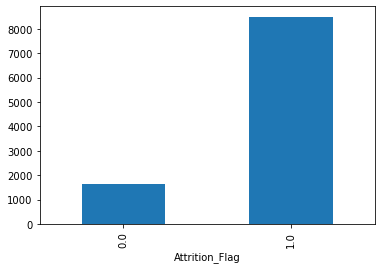

In [109]:
Attrition_Flag.plot(kind = 'bar')
plt.show()

## Modeling

In [110]:
# get columns except the first one
features = df.columns[1:].tolist()

In [111]:
# get features and labels
data = df[features].values
label = df['Attrition_Flag']

In [113]:
# split data to training set and testing set
data_train,data_test,label_train,label_test = train_test_split(data, label, test_size = 0.2,random_state = 42)

# 5-fold cross validation of different k value
scores=[]
for k in range(1,31):
    knn = KNeighborsClassifier(k)
    val = cross_val_score(knn, data_train, label_train, scoring = 'accuracy', cv = 5)  
    scores.append(val.mean())
    print('k =', k, ', mean score of 5-fold cross val :', val.mean(), 'Error:',error)
    error = 1 - val.mean()
print('The mean val score of all k :', np.mean(scores))

# get best k value = index + 1
best_k = np.argmax(scores) + 1
print('The best k value is:',best_k)

# train and test the knn model
knn = KNeighborsClassifier(best_k)
knn.fit(data_train,label_train)
print('prediction precision rate:',knn.score(data_test,label_test))

# loss function
label_pred = knn.predict(data_test)
label_true = np.array(label_test)
loss = 0
for i in range(len(label_pred)):
    loss += ((label_pred[i] - label_true[i])**2)/len(label_pred)
print('The loss is:',loss)

k = 1 , mean score of 5-fold cross val : 0.8647078087752569 Error: 0.18785673688820148
k = 2 , mean score of 5-fold cross val : 0.8355769567634672 Error: 0.13529219122474312
k = 3 , mean score of 5-fold cross val : 0.8807560490780725 Error: 0.16442304323653278
k = 4 , mean score of 5-fold cross val : 0.8763114523118636 Error: 0.11924395092192752
k = 5 , mean score of 5-fold cross val : 0.8850758943191599 Error: 0.12368854768813642
k = 6 , mean score of 5-fold cross val : 0.8859397110456128 Error: 0.1149241056808401
k = 7 , mean score of 5-fold cross val : 0.8874218779750345 Error: 0.11406028895438725
k = 8 , mean score of 5-fold cross val : 0.8886562173936223 Error: 0.11257812202496553
k = 9 , mean score of 5-fold cross val : 0.8870510506393705 Error: 0.11134378260637767
k = 10 , mean score of 5-fold cross val : 0.889519653315664 Error: 0.11294894936062949
k = 11 , mean score of 5-fold cross val : 0.8864333858843422 Error: 0.11048034668433604
k = 12 , mean score of 5-fold cross val : 0

In [ ]:
"""
Conclusion:
The best value of k is 10
The validation score is 0.8810
Model presicion rate is 88.75%
The loss is: 0.1125
"""

## Label data is skewed, so make the amount of '0' and '1' balanced and model again

In [89]:
df_attrition = df[df['Attrition_Flag'] == 0]
df_attrition = pd.concat([df_attrition] * 4)
df_new = pd.concat([df,df_attrition])
df_new.shape

(16635, 27)

In [90]:
Attrition_Flag = df_new['Attrition_Flag'].groupby(df_new['Attrition_Flag']).count()
Attrition_Flag

Attrition_Flag
0.0    8135
1.0    8500
Name: Attrition_Flag, dtype: int64

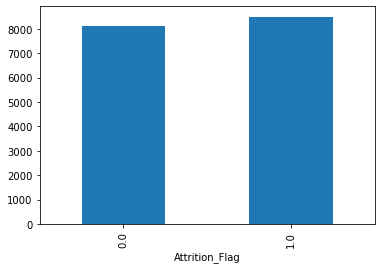

In [91]:
Attrition_Flag.plot(kind = 'bar')
plt.show()

## Modeling again

In [92]:
data = df_new[features].values
label = df_new['Attrition_Flag']

In [49]:
# split data to training set and testing set
data_train,data_test,label_train,label_test = train_test_split(data, label, test_size = 0.2,random_state = 42)

# 5-fold cross validation of different k value
scores=[]
for k in range(1,31):
    knn = KNeighborsClassifier(k)
    val = cross_val_score(knn, data_train, label_train, scoring = 'accuracy', cv = 5)  
    scores.append(val.mean())
    print('k =', k, ', mean score of 5-fold cross val :', val.mean(), 'Error:',error)
    error = 1 - val.mean()
print('The mean val score of all k :', np.mean(scores))

# get best k value = index + 1
best_k = np.argmax(scores) + 1
print('The best k value is:',best_k)

# train and test the knn model
knn = KNeighborsClassifier(best_k)
knn.fit(data_train,label_train)
print('prediction precision rate:',knn.score(data_test,label_test))

# loss function
label_pred = knn.predict(data_test)
label_true = np.array(label_test)
loss = 0
for i in range(len(label_pred)):
    loss += ((label_pred[i] - label_true[i])**2)/len(label_pred)
print('The loss is:',loss)

k = 1 , mean score of 5-fold cross val : 0.9489780452883867 Error: 0.11998423469737474
k = 2 , mean score of 5-fold cross val : 0.9079497350351842 Error: 0.051021954711613304
k = 3 , mean score of 5-fold cross val : 0.8950250028869575 Error: 0.09205026496481583
k = 4 , mean score of 5-fold cross val : 0.8669969233080099 Error: 0.10497499711304248
k = 5 , mean score of 5-fold cross val : 0.8514423917165074 Error: 0.13300307669199007
k = 6 , mean score of 5-fold cross val : 0.8267200407929209 Error: 0.14855760828349263
k = 7 , mean score of 5-fold cross val : 0.8310781466212998 Error: 0.17327995920707906
k = 8 , mean score of 5-fold cross val : 0.8227376205992958 Error: 0.16892185337870025
k = 9 , mean score of 5-fold cross val : 0.8395699520383897 Error: 0.17726237940070422
k = 10 , mean score of 5-fold cross val : 0.831679621976565 Error: 0.1604300479616103
k = 11 , mean score of 5-fold cross val : 0.8406968677711362 Error: 0.16832037802343502
k = 12 , mean score of 5-fold cross val : 

In [ ]:
"""
Conclusion:
The best value of k is 1
The validation score is 0.8348
Model presicion rate is 95.37% 
The loss is: 0.0463
"""

## Trying PCA for dimensionality reduction(Not to improve performace, it is to reduce calculation volume)

In [93]:
# get correlation matrix and exclude class attribute (the first column)
cor_martrix = df_new.iloc[:,1:].corr()
cor_martrix.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Gender_M,Gender_F,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Marital_Status_Divorced,Card_Category_Blue,Card_Category_Gold,Card_Category_Silver,Card_Category_Platinum
Customer_Age,1.000000,-0.135755,-0.007826,0.032641,0.780505,-0.026525,0.131166,-0.019944,0.016657,-0.002842,...,0.009564,-0.009564,-0.033533,0.022544,0.009110,-0.026023,0.013910,-0.023533,0.012418,-0.006839
Dependent_count,-0.135755,1.000000,-0.004921,0.059108,-0.117281,-0.032664,-0.010658,-0.025665,0.060021,0.001872,...,-0.012175,0.012175,-0.002794,0.041447,-0.065527,0.045922,-0.027020,0.022388,-0.001647,0.019715
Education_Level,-0.007826,-0.004921,1.000000,-0.032695,-0.012595,0.011913,-0.004916,0.001877,-0.026833,-0.009241,...,0.028160,-0.028160,-0.004318,0.019222,-0.013241,-0.007380,-0.013090,-0.003774,0.038712,0.008027
Income_Category,0.032641,0.059108,-0.032695,1.000000,0.022740,-0.035476,-0.008179,0.018555,0.557671,0.024964,...,-0.805352,0.805352,-0.001254,0.007824,-0.010480,0.005899,-0.097772,0.051299,-0.007223,0.086058
Months_on_book,0.780505,-0.117281,-0.012595,0.022740,1.000000,-0.017396,0.175732,-0.018581,0.017360,0.002028,...,0.003275,-0.003275,-0.023999,0.010659,0.014670,-0.023390,0.013304,-0.016467,0.000613,-0.007018


In [94]:
# get the features with high correlation 
high_cor = []
high_cor_repeat = []

for column in features:
    cor_values = cor_martrix[column].values.tolist()
    cor_values.remove(1)
    max_cor = np.max(cor_values)
    if max_cor > 0.6:
        index = cor_martrix[cor_martrix[column] == max_cor].index.tolist()[0]
        high_cor_repeat.append([max_cor, [column, index]])
        
high_cor_repeat.sort()
for i in range(0,len(high_cor_repeat),2):
    high_cor.append(high_cor_repeat[i])
high_cor

[[0.6946855441968267, ['Avg_Utilization_Ratio', 'Total_Revolving_Bal']],
 [0.7805047706891192, ['Customer_Age', 'Months_on_book']],
 [0.8053523967291879, ['Gender_F', 'Income_Category']],
 [0.8053901681243817, ['Total_Trans_Amt', 'Total_Trans_Ct']],
 [0.9952040726156282, ['Avg_Open_To_Buy', 'Credit_Limit']]]

## PCA

In [95]:
# get primary components vectors
pca = decomposition.PCA(n_components = 21)
pca.fit(data)
data = pca.transform(data)
print("Primary Components:",data)

Primary Components: [[ 7.95782711e-01 -7.00488803e-01 -1.05293458e-02 ...  1.79647121e-01
   2.53597103e-01 -1.46262278e-04]
 [-6.65503654e-01  7.28457838e-01  8.39393101e-02 ...  5.01723746e-01
   5.61395254e-01 -2.95240690e-02]
 [ 7.83772225e-01 -7.18534273e-01  4.95944605e-02 ...  5.75813306e-01
   4.44619666e-01  1.11216631e-02]
 ...
 [-6.90882918e-01 -6.24792958e-01  4.39974507e-01 ...  1.86640577e-01
  -1.36645448e-01 -6.13893873e-03]
 [ 6.49343137e-01  4.33533380e-02  1.18527671e-01 ...  8.54590648e-02
  -1.29462905e-01 -9.45325875e-04]
 [-5.50935564e-01 -5.92784428e-01  4.39518226e-01 ...  1.25369153e-01
  -1.65798039e-01 -1.34439135e-02]]


In [96]:
data.shape

(16635, 21)

## Modeling again

In [54]:
# split data to training set and testing set
data_train,data_test,label_train,label_test = train_test_split(data, label, test_size = 0.2,random_state = 42)

# 5-fold cross validation of different k value
scores=[]
for k in range(1,31):
    knn = KNeighborsClassifier(k)
    val = cross_val_score(knn, data_train, label_train, scoring = 'accuracy', cv = 5)  
    scores.append(val.mean())
    print('k =', k, ', mean score of 5-fold cross val :', val.mean(), 'Error:',error)
    error = 1 - val.mean()
print('The mean val score of all k :', np.mean(scores))

# get best k value = index + 1
best_k = np.argmax(scores) + 1
print('The best k value is:',best_k)

# train and test the knn model
knn = KNeighborsClassifier(best_k)
knn.fit(data_train,label_train)
print('prediction precision rate:',knn.score(data_test,label_test))

# loss function
label_pred = knn.predict(data_test)
label_true = np.array(label_test)
loss = 0
for i in range(len(label_pred)):
    loss += ((label_pred[i] - label_true[i])**2)/len(label_pred)
print('The loss is:',loss)

k = 1 , mean score of 5-fold cross val : 0.948527115236331 Error: 0.18838279842034722
k = 2 , mean score of 5-fold cross val : 0.9074990308575519 Error: 0.05147288476366896
k = 3 , mean score of 5-fold cross val : 0.8944239792805393 Error: 0.0925009691424481
k = 4 , mean score of 5-fold cross val : 0.867598116320246 Error: 0.1055760207194607
k = 5 , mean score of 5-fold cross val : 0.8506159454355157 Error: 0.13240188367975403
k = 6 , mean score of 5-fold cross val : 0.8270958111305834 Error: 0.14938405456448434
k = 7 , mean score of 5-fold cross val : 0.8324308803088607 Error: 0.1729041888694166
k = 8 , mean score of 5-fold cross val : 0.822963099742475 Error: 0.1675691196911393
k = 9 , mean score of 5-fold cross val : 0.8394197173125123 Error: 0.17703690025752505
k = 10 , mean score of 5-fold cross val : 0.8318300543425629 Error: 0.1605802826874877
k = 11 , mean score of 5-fold cross val : 0.8392691720093026 Error: 0.16816994565743715
k = 12 , mean score of 5-fold cross val : 0.83243

In [ ]:
"""
Conclusion:
The best value of k is 1
The validation score is 0.8348
Model presicion rate is 95.28%
The loss is: 0.0472
"""

## Test set must contains duplicated samples, this will affect accuracy of model, so remove them from test set

In [97]:
s = pd.DataFrame(data_test)
t = pd.DataFrame(label_test)
s.shape

(3327, 21)

In [98]:
t = t.reset_index()
del t['index']
t.head()

,Attrition_Flag
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [99]:
# remove the duplicated samples of test set
df_rm_dp = pd.concat([t, s], axis=1)
df_rm_dp = df_rm_dp.drop_duplicates()
df_rm_dp.shape

(2816, 22)

In [100]:
data_test = df_rm_dp.iloc[:,1:].values
label_test = df_rm_dp['Attrition_Flag']

In [101]:
# split data to training set and testing set
data_train,data_test,label_train,label_test = train_test_split(data, label, test_size = 0.2,random_state = 42)

# 5-fold cross validation of different k value
scores=[]
for k in range(1,31):
    knn = KNeighborsClassifier(k)
    val = cross_val_score(knn, data_train, label_train, scoring = 'accuracy', cv = 5)  
    scores.append(val.mean())
    print('k =', k, ', mean score of 5-fold cross val :', val.mean(), 'Error:',error)
    error = 1 - val.mean()
print('The mean val score of all k :', np.mean(scores))

# get best k value = index + 1
best_k = np.argmax(scores) + 1
print('The best k value is:',best_k)

# train and test the knn model
knn = KNeighborsClassifier(best_k)
knn.fit(data_train,label_train)
print('prediction precision rate:',knn.score(data_test,label_test))

# loss function
label_pred = knn.predict(data_test)
label_true = np.array(label_test)
loss = 0
for i in range(len(label_pred)):
    loss += ((label_pred[i] - label_true[i])**2)/len(label_pred)
print('The loss is:',loss)

k = 1 , mean score of 5-fold cross val : 0.948527115236331 Error: 0.18785673688820148
k = 2 , mean score of 5-fold cross val : 0.9074990308575519 Error: 0.05147288476366896
k = 3 , mean score of 5-fold cross val : 0.8944239792805393 Error: 0.0925009691424481
k = 4 , mean score of 5-fold cross val : 0.867598116320246 Error: 0.1055760207194607
k = 5 , mean score of 5-fold cross val : 0.8506159454355157 Error: 0.13240188367975403
k = 6 , mean score of 5-fold cross val : 0.8270958111305834 Error: 0.14938405456448434
k = 7 , mean score of 5-fold cross val : 0.8324308803088607 Error: 0.1729041888694166
k = 8 , mean score of 5-fold cross val : 0.822963099742475 Error: 0.1675691196911393
k = 9 , mean score of 5-fold cross val : 0.8394197173125123 Error: 0.17703690025752505
k = 10 , mean score of 5-fold cross val : 0.8318300543425629 Error: 0.1605802826874877
k = 11 , mean score of 5-fold cross val : 0.8392691720093026 Error: 0.16816994565743715
k = 12 , mean score of 5-fold cross val : 0.83243

In [114]:
# get the label test set and prediction set as as pd series
label_pred = pd.Series(knn.predict(data_test))
label_true = label_test
unique_labels = np.array([0, 1])

# Construct confusion matrix
confusion_matrix = np.zeros([len(unique_labels), len(unique_labels)])
for i, label_i in enumerate(unique_labels):
    for j, label_j in enumerate(unique_labels):
        confusion_matrix[i, j] = ((label_test == label_i) & (label_pred == label_j)).sum()
print(confusion_matrix)        

# compute accuracy
accuracy = 0
for i in range(len(unique_labels)):
    accuracy += confusion_matrix[i, i] / confusion_matrix.sum()
    
# compute macro F1 and micro F1

tps, fps, fns = 0, 0, 0
f1s = []
for i in range(len(unique_labels)):
    tp = confusion_matrix[i, i]
    fp = confusion_matrix[:, i].sum()-confusion_matrix[i, i]
    fn = confusion_matrix[i, :].sum()-confusion_matrix[i, i]
        
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    f1 = 1/ (0.5 * (1/precision + 1/recall))
        
    f1s.append(f1)
    tps += tp
    fps += fp
    fns += fn
    
macro_f1 = sum(f1s) / len(f1s)
    
micro_precision = tps / (tps+fps)
micro_recall = tps / (tps+fns)
micro_f1 = 1/ (0.5 * (1/micro_precision + 1/micro_recall))

# append results of this fold
test_accuracy = []
test_macro_f1 = []
test_micro_f1 = []
test_accuracy.append(accuracy)
test_macro_f1.append(macro_f1)
test_micro_f1.append(micro_f1)
    
print(f'Accuracy: {sum(test_accuracy)/len(test_accuracy):.3f}')
print(f'Macro-F1: {sum(test_macro_f1)/len(test_macro_f1):.3f}')
print(f'Micro-F1: {sum(test_micro_f1)/len(test_micro_f1):.3f}')

[[  3.  22.]
 [ 32. 360.]]
Accuracy: 0.871
Macro-F1: 0.515
Micro-F1: 0.871


In [ ]:
"""
-------------------------------------------
Conclusion:
The best value of k is 1
The validation score is 0.8348784
Model presicion rate is 95.281%
The loss is: 0.04719
-------------------------------------------
The confusion matrixi is:
                            [[  3.  22.]
                             [ 32. 360.]]
Accuracy: 0.871
Macro-F1: 0.515
Micro-F1: 0.871
-------------------------------------------
"""